In [29]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math
%matplotlib inline

In [30]:
titanic_data=pd.read_csv('train.csv')

In [31]:
titanic_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [32]:
x=titanic_data.iloc[:,1]
y=titanic_data.iloc[:,3]
data=pd.DataFrame(y,x)
data

,Name
Survived,
0,"Braund, Mr. Owen Harris"
1,"Cumings, Mrs. John Bradley (Florence Briggs Th..."
1,"Cumings, Mrs. John Bradley (Florence Briggs Th..."
1,"Cumings, Mrs. John Bradley (Florence Briggs Th..."
0,"Braund, Mr. Owen Harris"
...,...
0,"Braund, Mr. Owen Harris"
1,"Cumings, Mrs. John Bradley (Florence Briggs Th..."
0,"Braund, Mr. Owen Harris"


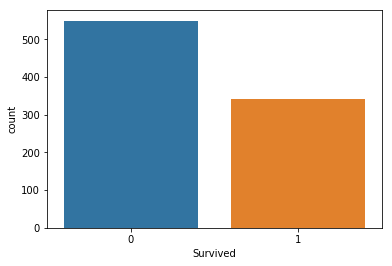

In [33]:
d1=titanic_data.iloc[:50]
sns.countplot(x="Survived",data=titanic_data)

In [34]:
titanic_data=titanic_data.replace(np.nan,0)
titanic_data=titanic_data.astype({"Age":int})
x1=titanic_data['Age'].max()
c=0
print(x1)
for i in titanic_data['Age']:
    if i == x1:
        c+=1

print("The number of old people in the ship are {} and their age is {}".format(c,x1))
avg_age=titanic_data['Age'].mean()
print("The average age is: ",int(avg_age))
count=0
for i in titanic_data['Age']:
    if i == int(avg_age):
        count+=1
print("The number of middle aged people in the ship are {}".format(count))
print("The number of male in the ship were",(titanic_data['Sex']=='male').sum())
print("The number of female in the ship were",(titanic_data['Sex']=='female').sum())
#rint(titanic_data.loc[titanic_data.Sex=='male','Sex'].count())
print("The number of male who survived are",titanic_data[titanic_data.Sex=='male'].Survived.sum())
print("The number of female who survived are",titanic_data[titanic_data.Sex=='female'].Survived.sum())

80
The number of old people in the ship are 1 and their age is 80
The average age is:  23
The number of middle aged people in the ship are 16
The number of male in the ship were 577
The number of female in the ship were 314
The number of male who survived are 109
The number of female who survived are 233


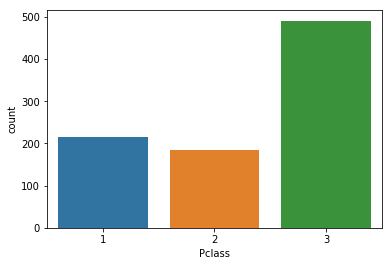

In [35]:
sns.countplot(x='Pclass',data=titanic_data)

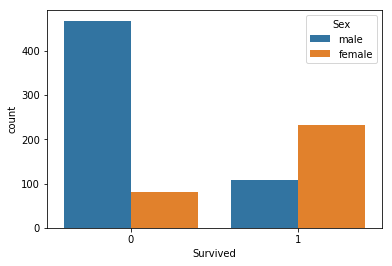

In [36]:
sns.countplot(x="Survived",hue="Sex",data=titanic_data)

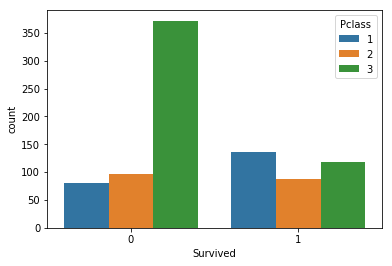

In [11]:
sns.countplot(x="Survived",hue="Pclass",data=titanic_data)

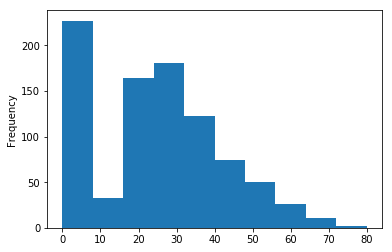

In [37]:
titanic_data['Age'].plot.hist()

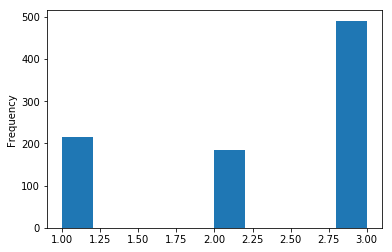

In [38]:
titanic_data['Pclass'].plot.hist()

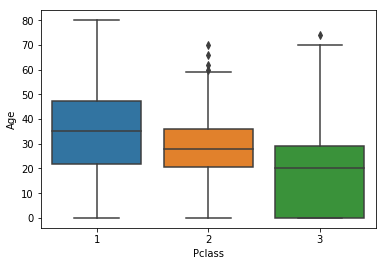

In [39]:
sns.boxplot(x="Pclass",y="Age",data=titanic_data)

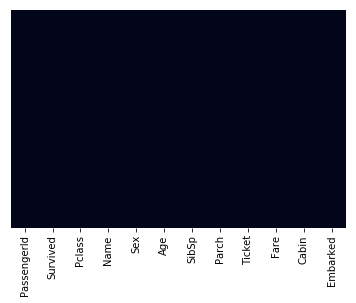

In [40]:
sns.heatmap(titanic_data.isnull(),yticklabels=False,cbar=False)

In [41]:
titanic_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [42]:
test=titanic_data

In [44]:
test.drop('Cabin',axis=1,inplace=True)

In [45]:
test.dropna(inplace=True)

In [46]:
sex = pd.get_dummies(test['Sex'],drop_first=True)
embark = pd.get_dummies(test['Embarked'],drop_first=True)

In [47]:
test = pd.concat([test,sex,embark],axis=1)

In [48]:
test.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [50]:
test.drop('C',axis=1)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22,1,0,7.2500,1,0,1
1,2,1,1,38,1,0,71.2833,0,0,0
2,3,1,3,26,0,0,7.9250,0,0,1
3,4,1,1,35,1,0,53.1000,0,0,1
4,5,0,3,35,0,0,8.0500,1,0,1
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,27,0,0,13.0000,1,0,1
887,888,1,1,19,0,0,30.0000,0,0,1
888,889,0,3,0,1,2,23.4500,0,0,1
889,890,1,1,26,0,0,30.0000,1,0,0


In [52]:
X = test.drop('Survived',axis=1)
y = test['Survived']

In [53]:
from sklearn.model_selection import train_test_split

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [63]:
from sklearn.linear_model import LogisticRegression

In [64]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [65]:
logmodel.score(X_train,y_train)

0.8154093097913323

In [66]:
test_x = test.drop('PassengerId',axis=1)

In [67]:
predictions = logmodel.predict(test_x)

In [68]:
final_prediction = pd.DataFrame({'PassengerId':test['PassengerId'],'Survived':predictions})

In [70]:
final_prediction

,PassengerId,Survived
0,1,0
1,2,1
2,3,1
3,4,1
4,5,0
...,...,...
886,887,0
887,888,1
888,889,1
889,890,0
